In [26]:
!pip install matplotlib
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Image

In [29]:
def raed_file(filename):
  image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.show()
  return image

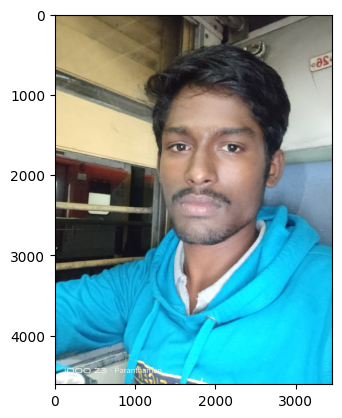

In [30]:
filename = "IMG_20220106_223329.jpg"
image = raed_file(filename)


## Create Edge Mask



In [31]:
def edge_mask(image,line_size, blur_value):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  glay_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(glay_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

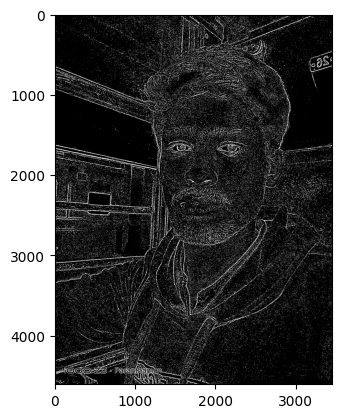

In [45]:
line_size, blur_value = 11,3
edges = edge_mask(image, line_size, blur_value)

plt.imshow(edges, cmap="binary")
plt.show()

# Reduce the color plette

In [48]:
def color_quantization(image, k):
  #transform the image
  data = np.float32(image).reshape((-1,3))
  #determine the criteria
  criteria = (cv2.TermCriteria_EPS+ cv2.TermCriteria_MAX_ITER, 20, 0.001 )

  #implement K-Means
  ret , label, center = cv2.kmeans(data, k, None, criteria,10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)


  result  = center[label.flatten()]
  result = result.reshape(image.shape)
  return result

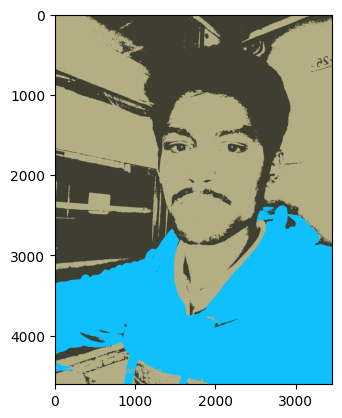

In [66]:
image = color_quantization(image, k=3)
plt.imshow(image)
plt.show()


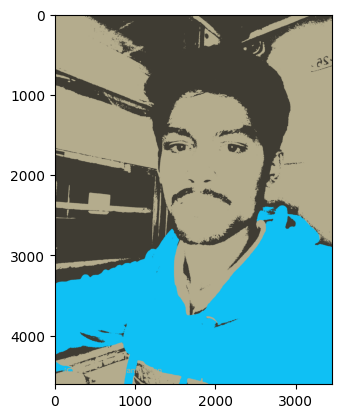

In [53]:
#reduce noise

blurred = cv2.bilateralFilter(image, d=9, sigmaColor=200, sigmaSpace=200)
plt.imshow(image)
plt.show()


# combine Edge Mask with Quantize  img

In [63]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask= edges )
  plt.imshow(c)
  plt.show()


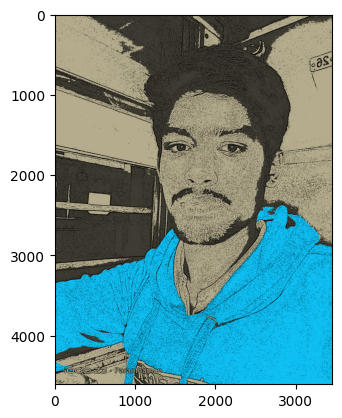

In [67]:
cartoon()